<a href="https://colab.research.google.com/github/SantiData87/yFinance/blob/main/Bandas_de_Bollinger_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://x.com/nacho_java/status/1835489740176400871


[*********************100%***********************]  1 of 1 completed


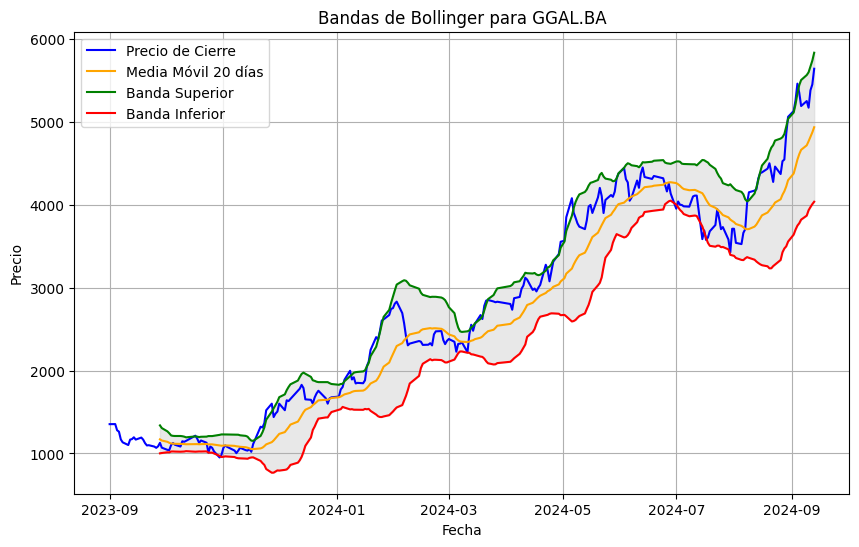

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# Fecha de hoy
today = date.today()

# Descargar datos de un activo
ticker = 'GGAL.BA'
df = yf.download(ticker, start="2023-09-01", end=today)

# Calcular la Media Móvil de 20 días
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Calcular la desviación estándar de 20 días
df['stddev'] = df['Close'].rolling(window=20).std()

# Calcular las Bandas de Bollinger
df['Upper_Band'] = df['SMA_20'] + (df['stddev'] * 2)
df['Lower_Band'] = df['SMA_20'] - (df['stddev'] * 2)

# Crear un DataFrame con las columnas de interés
df_bollinger = df[['Close', 'SMA_20', 'Upper_Band', 'Lower_Band']]

# Graficar las Bandas de Bollinger
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Precio de Cierre', color='blue')
plt.plot(df.index, df['SMA_20'], label='Media Móvil 20 días', color='orange')
plt.plot(df.index, df['Upper_Band'], label='Banda Superior', color='green')
plt.plot(df.index, df['Lower_Band'], label='Banda Inferior', color='red')
plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], color='lightgrey', alpha=0.5)

# Personalizar el gráfico
plt.title(f'Bandas de Bollinger para {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Exportar a un archivo Excel
df_bollinger.to_excel('bandas_de_bollinger_con_grafico.xlsx', index=False)
